<a href="https://colab.research.google.com/github/bsong75/brendensong-portfolio/blob/master/1.a.%20LinearReg_Deep%20Learning%20FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import neighbors

In [2]:
df=pd.read_csv('/content/drive/MyDrive/csv/data3.csv')

In [3]:
df.describe()

,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Total Skillset,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKRating
count,501.000000,501.000000,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,82.894212,84.812375,2.699002e+07,93.101796,1.738523,2.500998,2021.463074,3.313373,3.045908,63.630739,59.556886,61.435130,74.03992,58.716567,70.109780,63.289421,57.441118,68.117764,73.786427,71.281437,71.622754,71.155689,80.678643,67.822355,69.792415,70.003992,72.736527,71.297405,62.688623,65.838323,58.037924,63.954092,71.177645,59.770459,77.093812,57.522954,56.510978,53.237525,92.756487
std,2.689756,3.228115,1.651782e+07,76.392013,0.439878,0.875499,278.764476,0.771752,1.106295,21.925359,23.478741,21.453351,15.78830,22.524198,22.084789,22.738999,21.972779,15.750940,19.549330,14.182476,13.059074,14.762781,4.182167,15.936699,18.997285,12.501999,15.567866,11.754207,22.873803,18.228434,24.457975,24.240212,13.478515,18.479968,8.215180,23.927264,26.499856,26.630236,113.989563
min,80.000000,80.000000,0.000000e+00,0.000000,1.000000,1.000000,1103.000000,1.000000,1.000000,9.000000,8.000000,10.000000,15.00000,8.000000,9.000000,9.000000,8.000000,16.000000,14.000000,30.000000,33.000000,29.000000,66.000000,25.000000,14.000000,30.000000,20.000000,34.000000,7.000000,11.000000,10.000000,7.000000,22.000000,11.000000,20.000000,9.000000,10.000000,8.000000,5.000000
25%,81.000000,82.000000,1.700000e+07,40.000000,1.000000,2.000000,1970.000000,3.000000,2.000000,55.000000,45.000000,52.000000,74.00000,45.000000,64.000000,52.000000,45.000000,64.000000,73.000000,63.000000,65.000000,61.000000,78.000000,57.000000,66.000000,63.000000,68.000000,63.000000,52.000000,56.000000,35.000000,50.000000,63.000000,50.000000,74.000000,36.000000,32.000000,27.000000,48.000000
50%,82.000000,84.000000,2.200000e+07,73.000000,2.000000,3.000000,2111.000000,3.000000,3.000000,72.000000,68.000000,67.000000,79.00000,66.000000,79.000000,72.000000,63.000000,72.000000,81.000000,73.000000,73.000000,74.000000,81.000000,71.000000,77.000000,72.000000,76.000000,72.000000,72.000000,70.000000,66.000000,75.000000,75.000000,64.000000,78.000000,63.000000,64.000000,56.000000,53.000000
75%,84.000000,87.000000,3.150000e+07,125.000000,2.000000,3.000000,2191.000000,4.000000,4.000000,79.000000,78.000000,79.000000,83.00000,76.000000,84.000000,80.000000,75.000000,79.000000,84.000000,83.000000,80.000000,82.000000,83.000000,80.000000,82.000000,78.000000,83.000000,80.000000,79.000000,80.000000,81.000000,81.000000,81.000000,74.000000,82.000000,79.000000,82.000000,79.000000,61.000000
max,94.000000,95.000000,1.185000e+08,565.000000,2.000000,5.000000,2438.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.00000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,444.000000


In [ ]:
df. isnull().sum()

In [ ]:
#dropped columns that I am not interested in  df.drop(['....'],axis=1,inplace=True)

___Step 2: Data Analysis____________________

2.a.Exploration

In [5]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : 95
Maximum Overall Perforamnce : 94


2.B. Univariate Plot

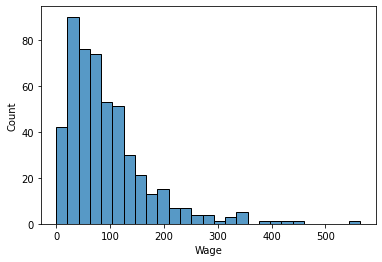

In [7]:
sns.histplot(df['Wage'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


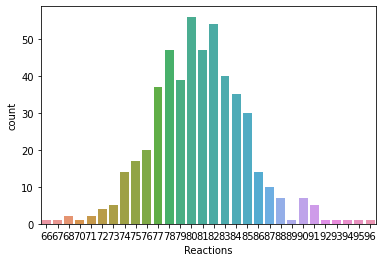

In [8]:
sns.countplot(df['Reactions'])

2.c. Multivariate Plot

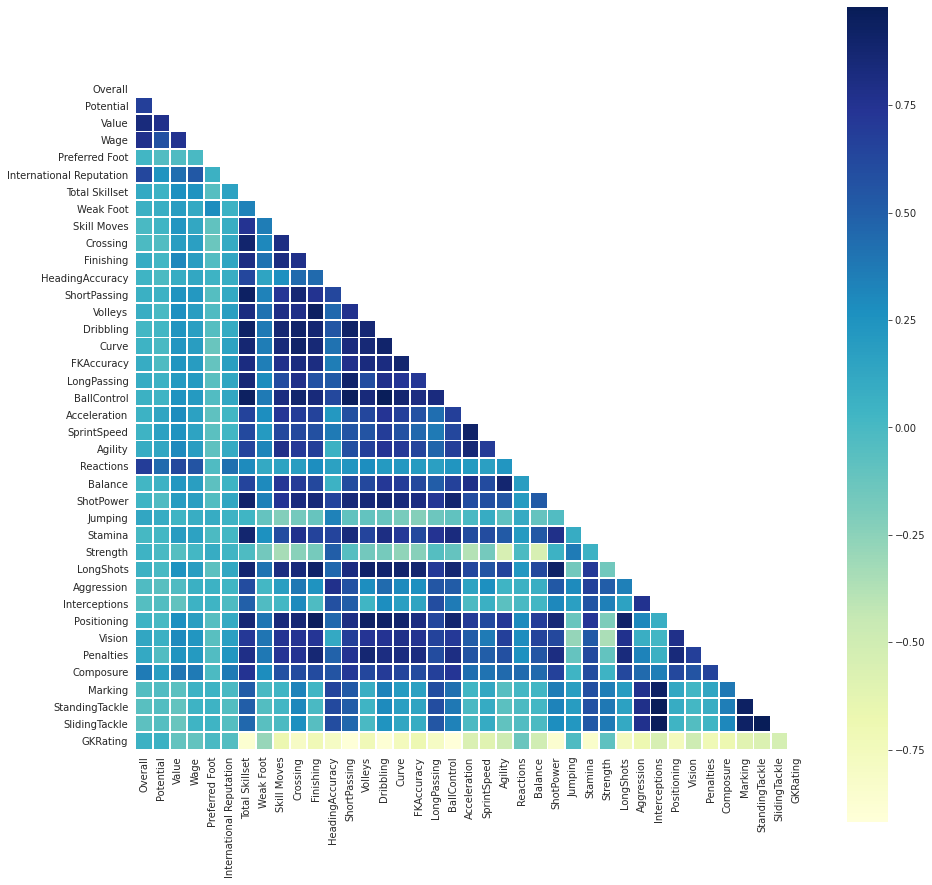

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

In [ ]:
corrmat=df.corr()
corrmat

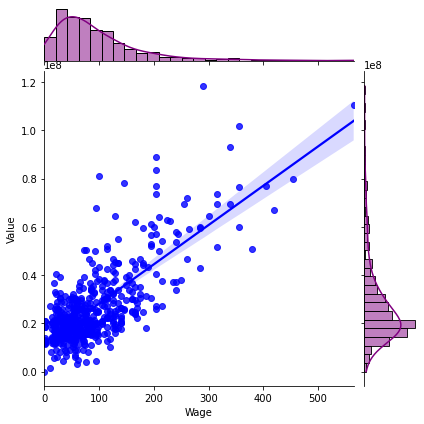

In [11]:
sns.jointplot(x=df['Wage'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [12]:
from scipy import stats
corr= stats.pearsonr(x=df['Wage'],y=df['Value'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 3.4819254864522258e-93
cor:		 0.7541489639676868


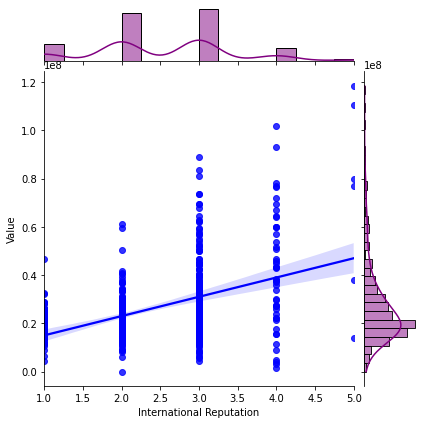

In [13]:
sns.jointplot(x=df['International Reputation'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

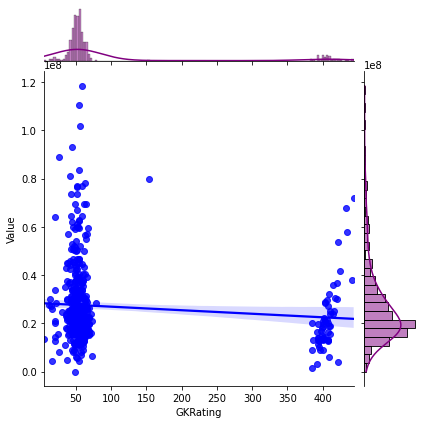

In [14]:
sns.jointplot(x=df['GKRating'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [15]:
from scipy import stats
corr= stats.pearsonr(x=df['GKRating'],y=df['Value'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.023374466403363242
cor:		 -0.1012860054193689


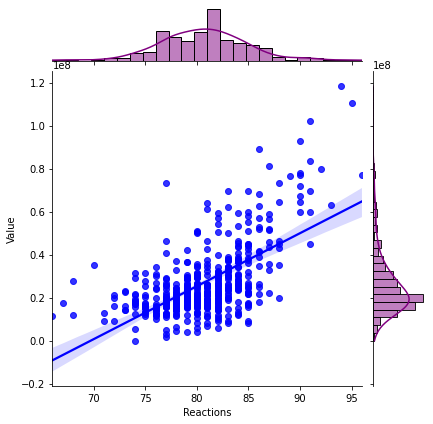

In [16]:
sns.jointplot(x=df['Reactions'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [17]:
#Split Value as a Target value
target = df.Value
df2 = df.drop(['Value', 'Overall'], axis = 1)
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.1)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(51, 37) (450, 37)
(51,) (450,)


In [18]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
#How much of variance is explained by the model?
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.6938104527024602
RMSE : 7780696.733171326


3.c. Run other models

#SVC model=SVC() model.fit(X_train, y_train) predictions = model.predict(X_test)

#KNN knn=neighbors.KNeighborsClassifier (n_neighbors=5) knn.fit(X_train, y_train) predictions= knn.predict(X_test)

#Random Forest Classifier from sklearn.ensemble import RandomForestClassifier model=RandomForestClassifier(n_estimators=200) model.fit(X_train, y_train) predictions = model.predict(X_test)

#Naive Bayes gnb=GaussianNB() gnb.fit(X_train, y_train) predictions=gnb.predict(X_test)

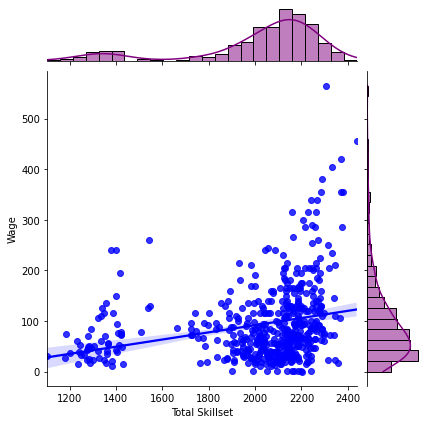

In [20]:
sns.jointplot(x=df2['Total Skillset'],y=df2['Wage'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

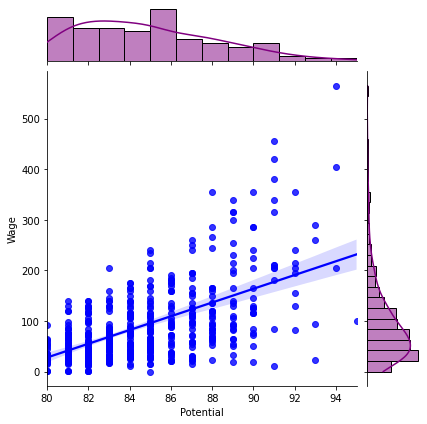

In [21]:
sns.jointplot(x=df2['Potential'],y=df2['Wage'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

## Deep Learning

In [43]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import keras


In [48]:
target = pd.DataFrame(target)
target.dtypes

Value    int64
dtype: object

In [49]:


train_ds = TensorDataset(torch.Tensor(np.array(df2)), torch.Tensor(np.array(target)))


In [ ]:
train_ds[0:3]

In [50]:
batch_size=10
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [57]:
import torch.nn as nn
model=nn.Linear(37,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1264, -0.1015,  0.1079,  0.0334,  0.1538,  0.1277,  0.1026, -0.1141,
          0.0283,  0.0485,  0.1213,  0.1396, -0.1613, -0.1121,  0.1017,  0.0515,
          0.1596, -0.1321, -0.0785, -0.0534, -0.1189, -0.1563, -0.1077, -0.1235,
         -0.1211, -0.0153,  0.1243,  0.0556,  0.1603,  0.0909,  0.1034,  0.0211,
          0.1102,  0.1566, -0.1276,  0.0995,  0.1401]], requires_grad=True)
Parameter containing:
tensor([0.0134], requires_grad=True)


In [66]:
input=TensorDataset(torch.Tensor(np.array(df2)))
print(input)

In [65]:
preds=model(TensorDataset(torch.Tensor(np.array(df2))))

AttributeError: ignored